In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
freq = pd.read_csv("polyreg.csv")

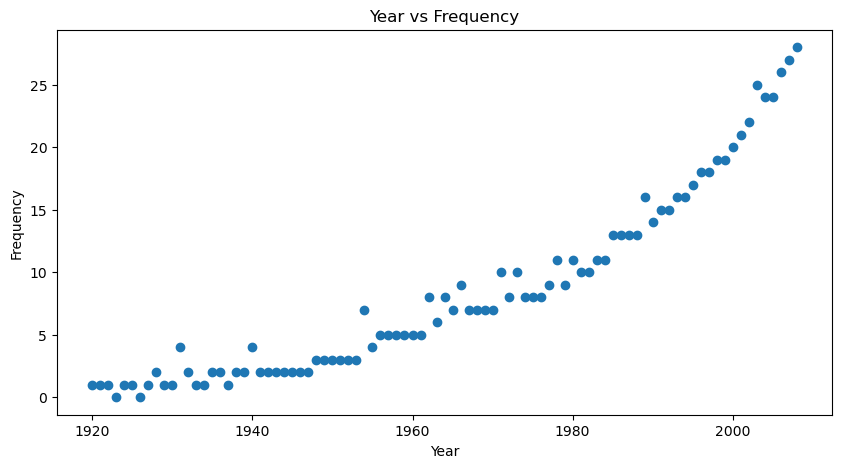

In [28]:
# plot freq_copy year vs frequency
plt.figure(figsize=(10, 5))
plt.scatter(freq['Year'], freq['Frequency'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year vs Frequency')
plt.show()


In [29]:
mono_increase = freq.copy()

In [30]:
# loop through mono_increase['Year] and reassign the frequency to the maximum frequency seen so far
for i in range(1, len(mono_increase)):
    mono_increase['Frequency'][i] = max(mono_increase['Frequency'][i], mono_increase['Frequency'][i - 1])


C:\Users\badmd\AppData\Local\Temp\ipykernel_11020\1065041361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mono_increase['Frequency'][i] = max(mono_increase['Frequency'][i], mono_increase['Frequency'][i - 1])
C:\Users\badmd\AppData\Local\Temp\ipykernel_11020\1065041361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mono_increase['Frequency'][i] = max(mono_increase['Frequency'][i], mono_increase['Frequency'][i - 1])
C:\Users\badmd\AppData\Local\Temp\ipykernel_11020\1065041361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

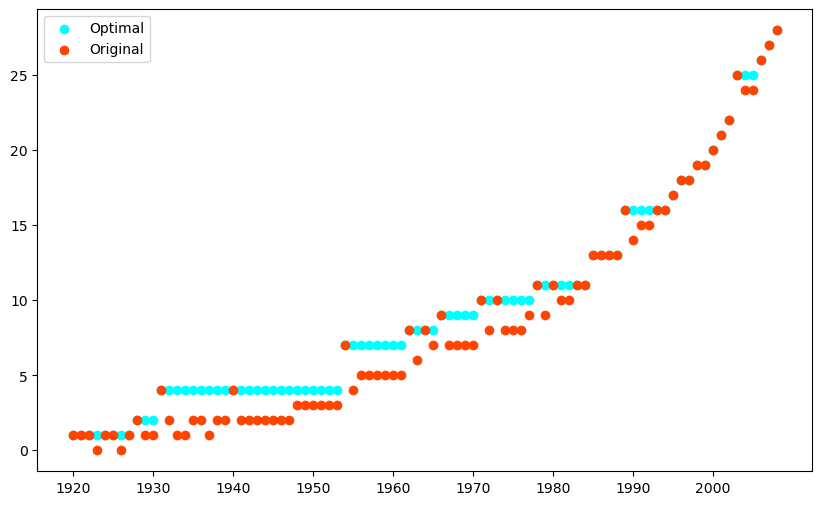

In [31]:
plt.figure(figsize=(10, 6))
# plt.scatter(freq['Year'], freq['Exponential_Predictions'], label='Exponential Predictions', color='lightgreen')
plt.scatter(mono_increase['Year'], mono_increase['Frequency'], label='Optimal', color='Aqua')
plt.scatter(freq['Year'], freq['Frequency'], label='Original', color='orangered')
plt.legend()
plt.xticks(np.arange(freq['Year'].min(), freq['Year'].max(), 10))
plt.show()

In [32]:
# in mono_inc, for every year, calculate the difference between the frequency and the frequency in freq

diff = mono_increase['Frequency'] - freq['Frequency']
# add diff to monoinc
freq['MonoInc'] = mono_increase['Frequency']
freq['Difference'] = diff
freq.head()

,Year,Frequency,Exponential_Predictions,Residuals,MonoInc,Difference
0,1920,1,1.0,0.0,1,0
1,1921,1,1.0,0.0,1,0
2,1922,1,1.0,0.0,1,0
3,1923,0,1.0,-1.0,1,1
4,1924,1,1.0,0.0,1,0


In [33]:
# diff_df = pd.DataFrame({'Year': year_frequency['Year'], 'Diff': mono_increase['Frequency'] - year_frequency['Frequency']})
# print(diff_df.sort_values(by=['Diff', 'Year'], ascending=[False, False]).head(16))
# print(sum(diff_df['Diff']))
print(freq.sort_values(by=['Difference', 'Year'], ascending=[False, False]).head(16))
print(sum(freq['Difference']))

    Year  Frequency  Exponential_Predictions  Residuals  MonoInc  Difference
35  1955          4                 4.307323  -0.307323        7           3
17  1937          1                 2.177186  -1.177186        4           3
14  1934          1                 1.866674  -0.866674        4           3
13  1933          1                 1.761697  -0.761697        4           3
70  1990         14                14.834349  -0.834349       16           2
59  1979          9                10.075498  -1.075498       11           2
56  1976          8                 9.051454  -1.051454       10           2
55  1975          8                 8.733253  -0.733253       10           2
54  1974          8                 8.426138  -0.426138       10           2
52  1972          8                 7.843990   0.156010       10           2
50  1970          7                 7.302667  -0.302667        9           2
49  1969          7                 7.046581  -0.046581        9           2

In [34]:
# max_diff = diff_df['Diff'].max()
# random_year = diff_df[diff_df['Diff'] == max_diff].sample(1)
# print(random_year['Year'].values[0])
max_diff = freq['Difference'].max()
# sort the max_diff by smallest 'Residuals'
next_batch = freq[freq['Difference'] == max_diff].sort_values(by='Residuals').head(5)
print(next_batch)


    Year  Frequency  Exponential_Predictions  Residuals  MonoInc  Difference
17  1937          1                 2.177186  -1.177186        4           3
14  1934          1                 1.866674  -0.866674        4           3
13  1933          1                 1.761697  -0.761697        4           3
35  1955          4                 4.307323  -0.307323        7           3


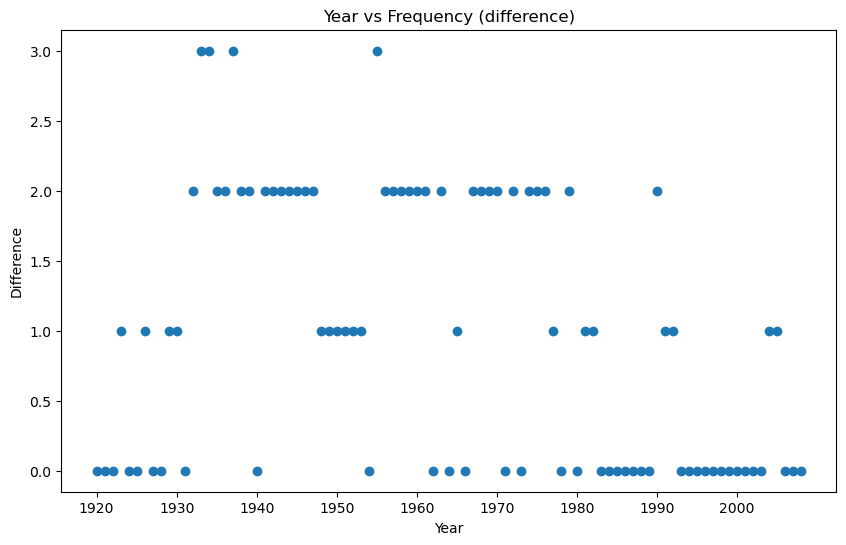

In [35]:
# # plot the difference
# plt.figure(figsize=(10, 6))
# plt.scatter(diff_df['Year'], diff_df['Diff'])
# plt.title('Year vs Frequency (difference)')
# plt.xlabel('Year')
# plt.ylabel('Difference')
# plt.xticks(np.arange(min_year, max_year+1, 10))
# plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(freq['Year'], freq['Difference'])
plt.title('Year vs Frequency (difference)')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.xticks(np.arange(freq['Year'].min(), freq['Year'].max(), 10))
plt.show()
